# WRAPPING UP THE BOOK - UNDERSTANDING PERFORMANCE

The book has centered itself on stock trading, and the purpose of this chapter is to understand performance by using the f.fn() package for creating a report. I believe this is one of the most interesting tools that can be used for a quick decision making on investment that does not involve a graphical decision. This can be applied to a portfolio and individual stocks. The application of the portfolio is as follows:

## Portfolio Performance using f.fn()


### – Import libraries

In [1]:
import ffn
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import ffn
%matplotlib inline

### – Select stocks

In [2]:
start=datetime.datetime(2019,1,1)
end=datetime.datetime(2020,12,31)

tickers = ['ZM', 'AMZN', 'DOCU','PTON']
stocks=pd.DataFrame()
for x in tickers:
    stocks[x]=yf.download(x, start=start, end=end)['Adj Close']

stocks.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,ZM,AMZN,DOCU,PTON
Date,,,,
2020-12-23,383.880005,159.263504,244.050003,162.759995
2020-12-24,375.170013,158.634506,244.929993,162.720001
2020-12-28,351.390015,164.197998,229.199997,152.179993
2020-12-29,353.750000,166.100006,228.160004,150.100006
2020-12-30,353.399994,164.292496,225.899994,154.960007


### – Calculate returns using f.fn ()

In [3]:
stocks_return = stocks.to_returns().dropna()
stocks_return.tail()

,ZM,AMZN,DOCU,PTON
Date,,,,
2020-12-23,-0.061418,-0.006627,-0.030008,0.009615
2020-12-24,-0.022689,-0.003949,0.003606,-0.000246
2020-12-28,-0.063385,0.035071,-0.064222,-0.064774
2020-12-29,0.006716,0.011584,-0.004537,-0.013668
2020-12-30,-0.000989,-0.010882,-0.009905,0.032378


### – Calculating mean variance returns with f.fn ( )

In [4]:
mean_variance_weights=stocks_return.calc_mean_var_weights().as_format('.2%')
mean_variance_weights

ZM      16.84%
AMZN    22.13%
DOCU    25.83%
PTON    35.21%
dtype: object

### – Applying the mean variance returns to portfolio weights,

In [5]:
portfolio_weights=(0.1759,0.2111,0.2592,0.3538)
portfolio_weights

(0.1759, 0.2111, 0.2592, 0.3538)

### – Creating the portfolio based on the returns

In [6]:
portfolio_weights=portfolio_weights/np.sum(portfolio_weights)
weighted_returns_portfolio=stocks_return.mul(portfolio_weights,axis=1)
stocks_return['Portfolio']=weighted_returns_portfolio.sum(axis=1).dropna()
stocks_return.tail()

,ZM,AMZN,DOCU,PTON,Portfolio
Date,,,,,
2020-12-23,-0.061418,-0.006627,-0.030008,0.009615,-0.016579
2020-12-24,-0.022689,-0.003949,0.003606,-0.000246,-0.003977
2020-12-28,-0.063385,0.035071,-0.064222,-0.064774,-0.043309
2020-12-29,0.006716,0.011584,-0.004537,-0.013668,-0.002385
2020-12-30,-0.000989,-0.010882,-0.009905,0.032378,0.006417


### – Calculate performance


In [7]:
performance = stocks_return.calc_stats()
performance.display()


c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, m

Stat                 ZM           AMZN        DOCU        PTON        Portfolio
-------------------  -----------  ----------  ----------  ----------  -----------
Start                2019-09-27   2019-09-27  2019-09-27  2019-09-27  2019-09-27
End                  2020-12-30   2020-12-30  2020-12-30  2020-12-30  2020-12-30
Risk-free rate       0.00%        0.00%       0.00%       0.00%       0.00%

Total Return         -97.87%      31.57%      -64.69%     -260.40%    -126.36%
Daily Sharpe         -1.50        -1.50       0.07        -           -0.96
Daily Sortino        -1.51        -1.55       0.28        inf         -1.72
CAGR                 -95.30%      24.34%      -56.24%     -           -
Max Drawdown         -1328.75%    -313.08%    -200.92%    -398.81%    -909.34%
Calmar Ratio         -0.07        0.08        -0.28       -           -

MTD                  -106.91%     27.37%      -322.50%    -52.12%     -75.12%
3m                   -109.99%     -988.95%    -191.30%    -364.48%

c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\ffn\core.py:1351: RuntimeWarning: invalid value encountered in scalar power
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1


The result of the portfolio, during the uncertainty of 2020 with a deplorable negative 126.09% of loss, a drawdown of negative 267.83% with an average of 49.11 days. The best month of the portfolio created a 113.76% but the implication of a worse month surpasses that. With this information corrections and backtesting can be created for better performance when analyzing the data. 

If the data wants to be seen with only one stock, the process is similar as when handling the DataFrame.

In [8]:
performance = stocks_return['Portfolio'].calc_stats()
performance.display()

Stats for Portfolio from 2019-09-27 00:00:00 - 2020-12-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-126.36%           -0.96  -       -909.34%

Annualized Returns:
mtd      3m        6m       ytd      1y      3y    5y    10y    incep.
-------  --------  -------  -------  ------  ----  ----  -----  --------
-75.12%  1234.06%  -54.10%  -53.29%  38.86%  -     -     -      -

Periodic:
        daily       monthly     yearly
------  ----------  ----------  --------
sharpe  -0.96       -1.34       -
mean    -19841.73%  -13905.41%  -53.29%
vol     20637.17%   10397.01%   -
skew    4.00        -3.10       -
kurt    52.23       9.85        -
best    12771.16%   114.51%     -53.29%
worst   -8757.79%   -11131.15%  -53.29%

Drawdowns:
max       avg         # days
--------  --------  --------
-909.34%  -260.94%      44.1

Misc:
---------------  ---------
avg. up month    51.60%
avg. down 

c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\ffn\core.py:1351: RuntimeWarning: invalid value encountered in scalar power
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1


## Fund Performance using f.fn()


As seen before, there are other analyses using performance that can be done, when analyzing the prices of a stock or in this case, a fund. Although funds have not been discussed in the book, it is important to understand that the statistical methods are similar, the interpretation changes regarding the instrument. The process is as follow:

### – Selecting funds using f.fn()

In [9]:
# MSAUX:Close, Morgan Stanley Inst Asia Opp A (MSAUX)
# MGGPX:Close, Morgan Stanley Institutional Fund, Inc. Global Opportunity Portfolio (MGGPX)
# MFAPX:Close, Morgan Stanley Institutional Fund, Inc. International Advantage Portfolio (MFAPX)
# SPY:Close, SPDR S&P 500 ETF Trust (SPY)

funds=ffn.get('MSAUX:Close,MIOPX:Close,MGGPX:Close,MFAPX:Close,SPY:Close',start='2018-01-01',end='2021-01-30')
funds.tail(10)
print(funds.columns)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Index(['msauxclose', 'miopxclose', 'mggpxclose', 'mfapxclose', 'spyclose'], dtype='object')


### – Creating an SMA for the Morgan Stanley Institutional Fund, Inc. Asia Opportunity Portfolio Class A (MSAUX) using PANDAS-TA with 20 days

In [10]:
funds['MAMSAUX'] = ta.sma(funds['msauxclose'], length=20)
funds


,msauxclose,miopxclose,mggpxclose,mfapxclose,spyclose,MAMSAUX
Date,,,,,,
2018-01-02,17.280001,22.520000,22.559999,16.850000,268.769989,NaN
2018-01-03,17.360001,22.629999,22.770000,16.900000,270.470001,NaN
2018-01-04,17.500000,22.750000,22.900000,17.010000,271.609985,NaN
2018-01-05,17.709999,22.920000,23.129999,17.100000,273.420013,NaN
2018-01-08,17.790001,22.889999,23.190001,17.049999,273.920013,NaN
...,...,...,...,...,...,...
2021-01-25,34.349998,42.810001,43.990002,26.910000,384.390015,32.0655
2021-01-26,33.910000,42.509998,43.630001,26.969999,383.790009,32.2535
2021-01-27,33.110001,41.509998,42.290001,26.430000,374.410004,32.4040


### – Plotting the SMA for comparison (Fig. 3)

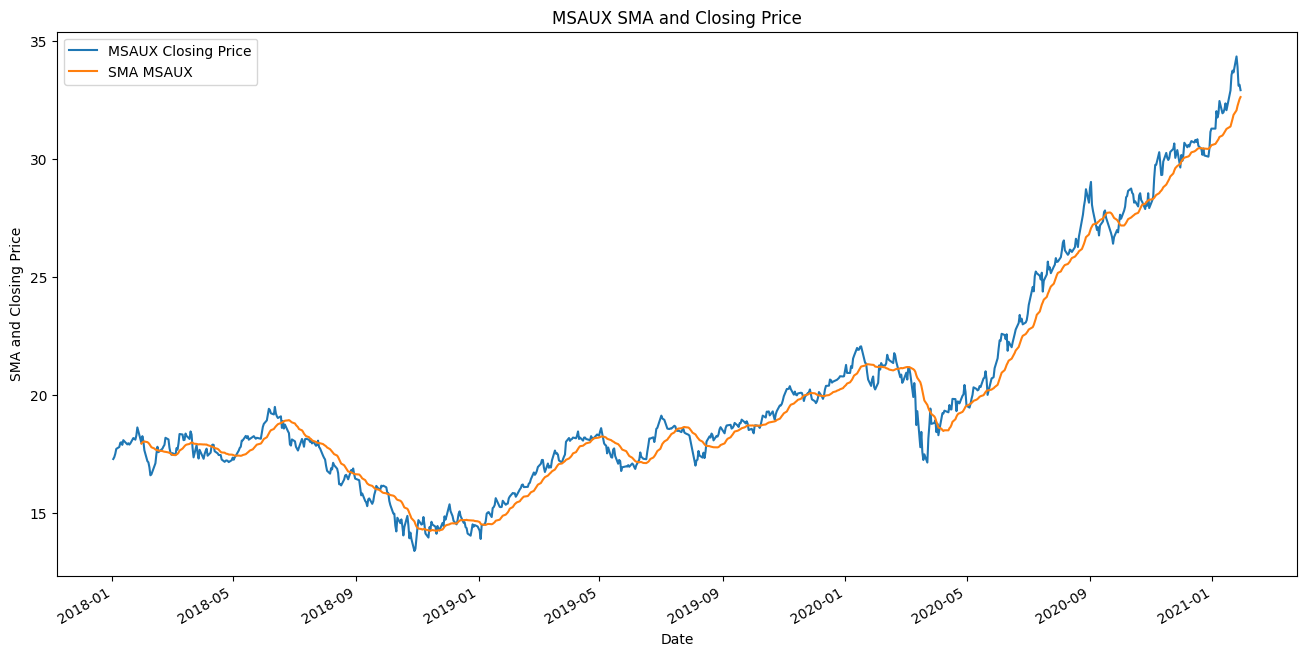

In [11]:
funds['msauxclose'].plot(label='MSAUX Closing Price',figsize=(16,8))
funds['MAMSAUX'].plot(label='SMA MSAUX')
_=plt.xlabel('Date')
_=plt.ylabel('SMA and Closing Price')
_=plt.title('MSAUX SMA and Closing Price')
plt.legend();

### – Creating an EMA for the Morgan Stanley Institutional Fund, Inc. Asia Opportunity Portfolio Class A (MSAUX) using PANDAS-TA with 20 days (Fig. 4)

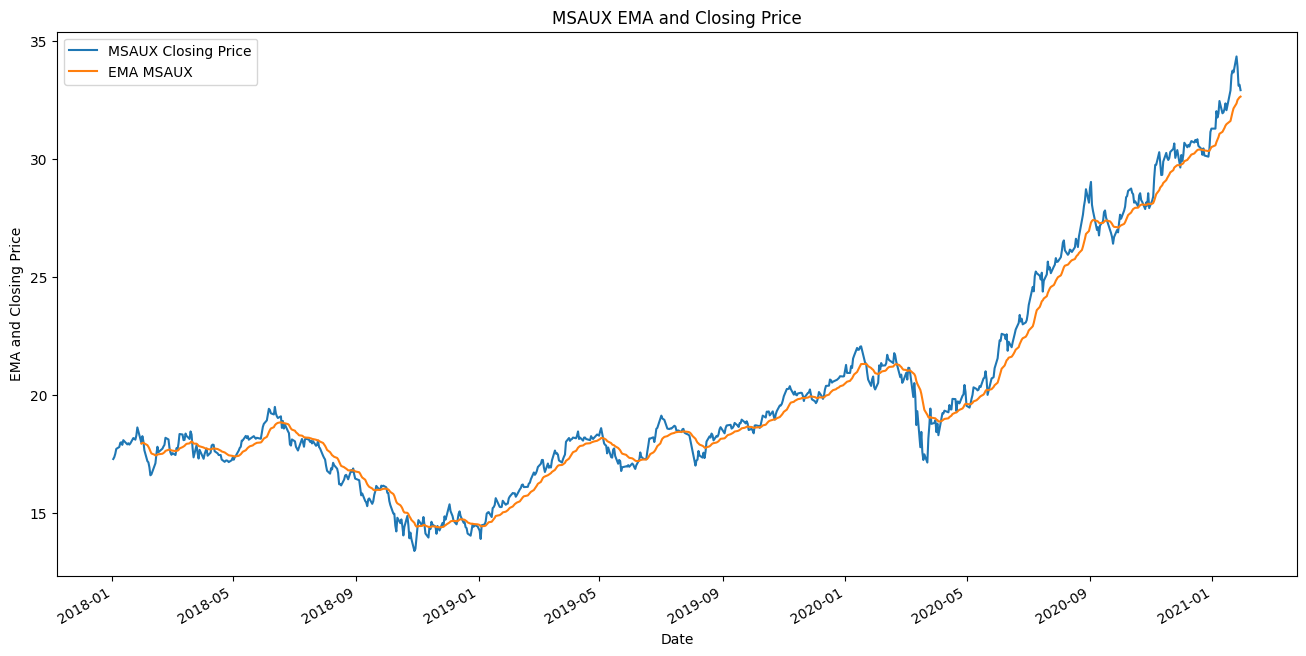

In [12]:
funds['EMAMSAUX'] = ta.ema(funds['msauxclose'], length=20)
funds
funds['msauxclose'].plot(label='MSAUX Closing Price',figsize=(16,8))
funds['EMAMSAUX'].plot(label='EMA MSAUX')
_=plt.xlabel('Date')
_=plt.ylabel('EMA and Closing Price')
_=plt.title('MSAUX EMA and Closing Price')

plt.legend();


### – Creating Bollinger Bands for the Morgan Stanley Institutional Fund, Inc. Asia Opportunity Portfolio Class A (MSAUX) using PANDAS-TA with 20 days (Fig. 5)

            BBL_20_2.0  BBM_20_2.0  BBU_20_2.0  BBB_20_2.0  BBP_20_2.0
Date                                                                  
2018-01-02         NaN         NaN         NaN         NaN         NaN
2018-01-03         NaN         NaN         NaN         NaN         NaN
2018-01-04         NaN         NaN         NaN         NaN         NaN
2018-01-05         NaN         NaN         NaN         NaN         NaN
2018-01-08         NaN         NaN         NaN         NaN         NaN
...                ...         ...         ...         ...         ...
2021-01-25   29.777510     32.0655   34.353489   14.270724    0.999237
2021-01-26   30.008477     32.2535   34.498523   13.921112    0.868927
2021-01-27   30.362252     32.4040   34.445748   12.601825    0.672891
2021-01-28   30.686088     32.5395   34.392912   11.391770    0.664697
2021-01-29   30.882542     32.6280   34.373457   10.699139    0.583645

[775 rows x 5 columns]
            msauxclose  miopxclose  mggpxclose  mfapx

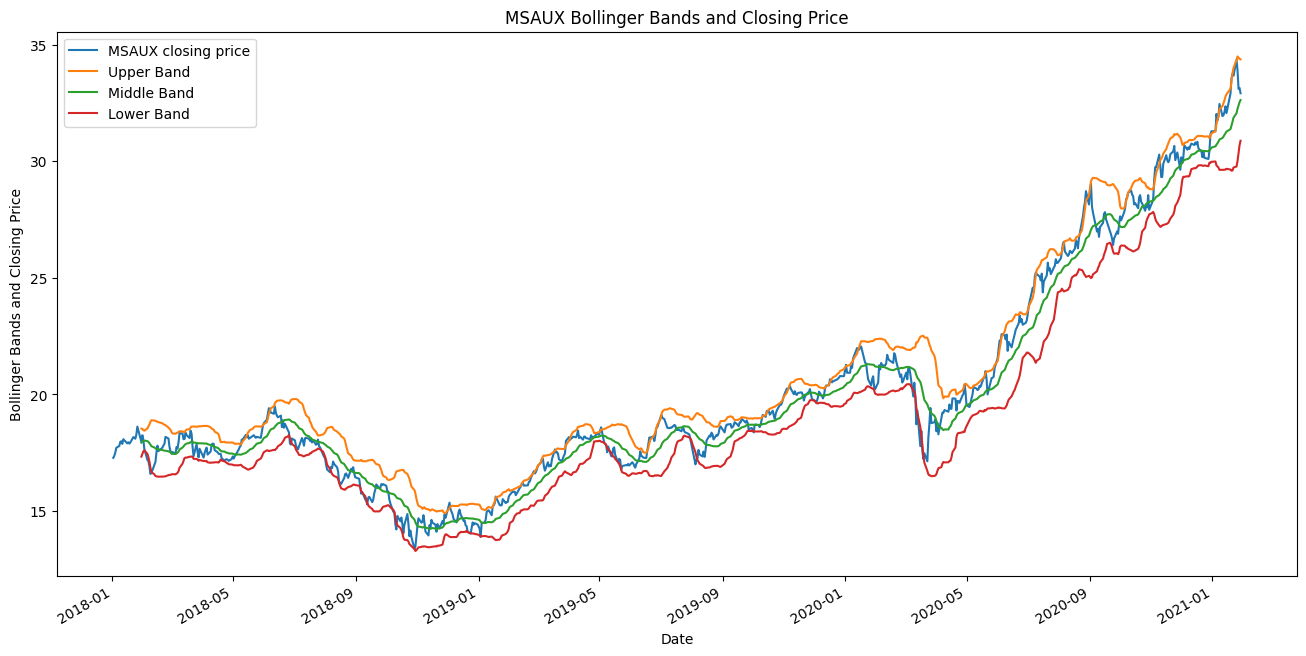

In [13]:

# Calcular las Bollinger Bands usando pandas_ta
bbands = ta.bbands(funds['msauxclose'], length=20)
print(bbands)
# Asignar las bandas a columnas separadas en el DataFrame 'funds'
funds['up_band'] = bbands['BBU_20_2.0']
funds['mid_band'] = bbands['BBM_20_2.0']
funds['low_band'] = bbands['BBL_20_2.0']
print(funds)
# Graficar los datos
plt.figure(figsize=(16, 8))
funds['msauxclose'].plot(label='MSAUX closing price')
funds['up_band'].plot(label='Upper Band')
funds['mid_band'].plot(label='Middle Band')
funds['low_band'].plot(label='Lower Band')

plt.xlabel('Date')
plt.ylabel('Bollinger Bands and Closing Price')
plt.title('MSAUX Bollinger Bands and Closing Price')
plt.legend()
plt.show()



### – Creating RSI for the Morgan Stanley Institutional Fund, Inc. Asia Opportunity Portfolio Class A (MSAUX) using talib with 14 days (Fig. 6)

            msauxclose  miopxclose  mggpxclose  mfapxclose    spyclose  \
Date                                                                     
2018-01-02   17.280001   22.520000   22.559999   16.850000  268.769989   
2018-01-03   17.360001   22.629999   22.770000   16.900000  270.470001   
2018-01-04   17.500000   22.750000   22.900000   17.010000  271.609985   
2018-01-05   17.709999   22.920000   23.129999   17.100000  273.420013   
2018-01-08   17.790001   22.889999   23.190001   17.049999  273.920013   
...                ...         ...         ...         ...         ...   
2021-01-25   34.349998   42.810001   43.990002   26.910000  384.390015   
2021-01-26   33.910000   42.509998   43.630001   26.969999  383.790009   
2021-01-27   33.110001   41.509998   42.290001   26.430000  374.410004   
2021-01-28   33.150002   41.810001   43.060001   26.610001  377.630005   
2021-01-29   32.919998   41.250000   42.509998   26.170000  370.070007   

            MAMSAUX   EMAMSAUX    up_

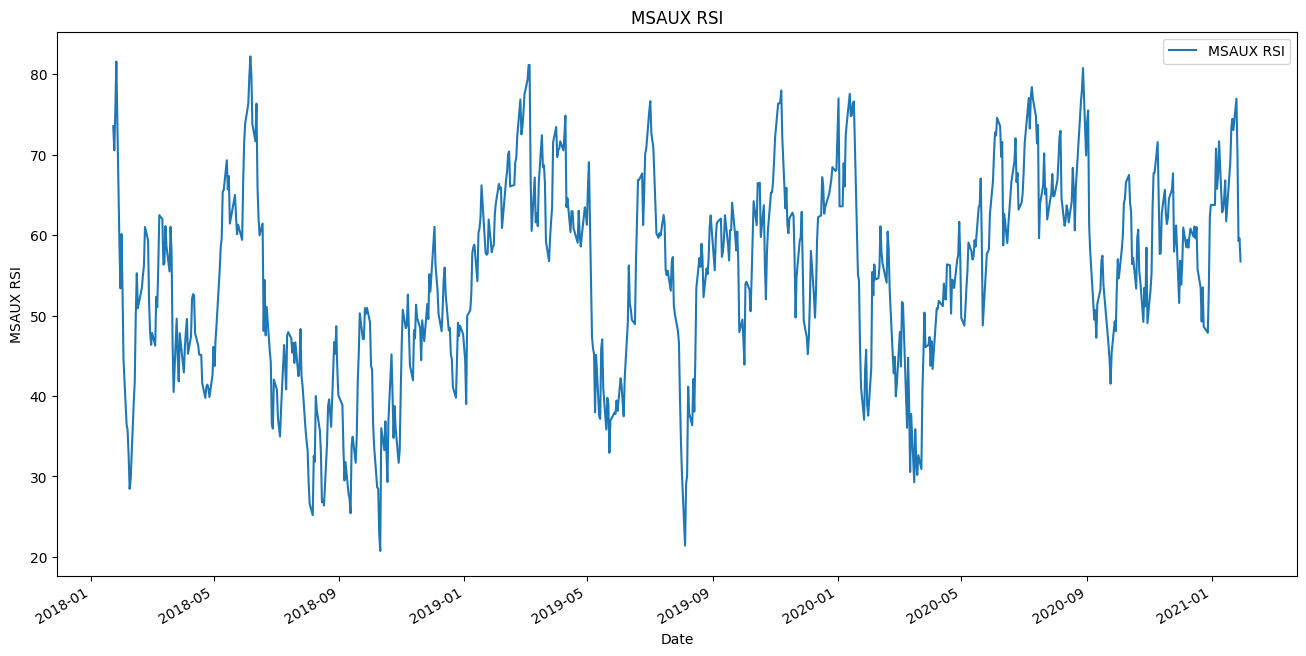

In [14]:
# Calcular el RSI utilizando pandas_ta
funds['RSI'] = ta.rsi(funds['msauxclose'], length=14)

# Imprimir el DataFrame con la columna RSI
print(funds)

# Graficar el RSI
plt.figure(figsize=(16, 8))
funds['RSI'].plot(label='MSAUX RSI')
plt.xlabel('Date')
plt.ylabel('MSAUX RSI')
plt.title('MSAUX RSI')
plt.legend()
plt.show()


### – Calculate logarithmic returns for the funds (excluding the above calculations)

In [15]:
funds = funds[['msauxclose', 'miopxclose', 'mggpxclose', 'mfapxclose', 'spyclose']]
print(funds)
returns=funds.to_log_returns().dropna()
returns.head()

            msauxclose  miopxclose  mggpxclose  mfapxclose    spyclose
Date                                                                  
2018-01-02   17.280001   22.520000   22.559999   16.850000  268.769989
2018-01-03   17.360001   22.629999   22.770000   16.900000  270.470001
2018-01-04   17.500000   22.750000   22.900000   17.010000  271.609985
2018-01-05   17.709999   22.920000   23.129999   17.100000  273.420013
2018-01-08   17.790001   22.889999   23.190001   17.049999  273.920013
...                ...         ...         ...         ...         ...
2021-01-25   34.349998   42.810001   43.990002   26.910000  384.390015
2021-01-26   33.910000   42.509998   43.630001   26.969999  383.790009
2021-01-27   33.110001   41.509998   42.290001   26.430000  374.410004
2021-01-28   33.150002   41.810001   43.060001   26.610001  377.630005
2021-01-29   32.919998   41.250000   42.509998   26.170000  370.070007

[775 rows x 5 columns]


,msauxclose,miopxclose,mggpxclose,mfapxclose,spyclose
Date,,,,,
2018-01-03,0.004619,0.004873,0.009265,0.002963,0.006305
2018-01-04,0.008032,0.005289,0.005693,0.006488,0.004206
2018-01-05,0.011929,0.007445,0.009994,0.005277,0.006642
2018-01-08,0.004507,-0.001310,0.002591,-0.002928,0.001827
2018-01-09,0.010067,0.005663,0.004732,0.005265,0.002261


### – Calculate a correlation matrix

In [16]:
returns.corr().as_format('.2f')

c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\ffn\utils.py:185: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return item.applymap(lambda x: format(x, format_str))


,msauxclose,miopxclose,mggpxclose,mfapxclose,spyclose
msauxclose,1.00,0.88,0.80,0.79,0.69
miopxclose,0.88,1.00,0.94,0.95,0.83
mggpxclose,0.80,0.94,1.00,0.90,0.89
mfapxclose,0.79,0.95,0.90,1.00,0.87
spyclose,0.69,0.83,0.89,0.87,1.00


### – Rebasing the funds for comparison on one another (Fig. 7)

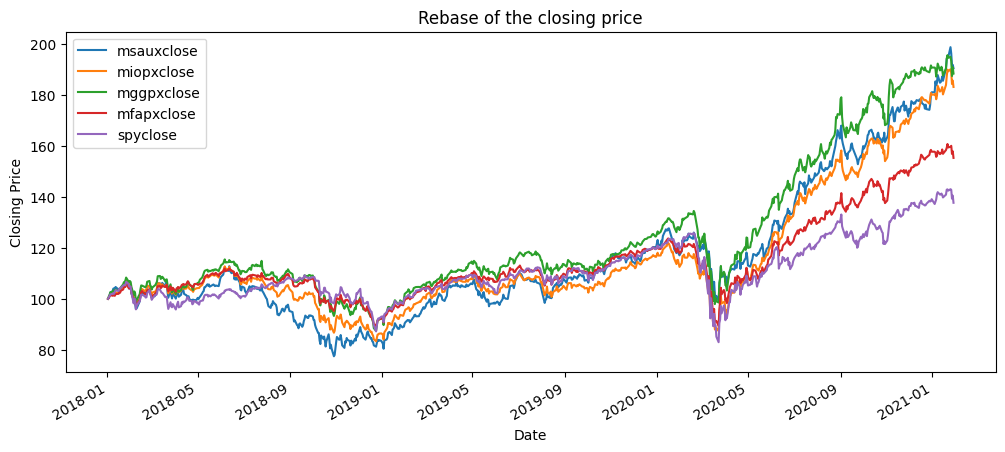

In [17]:
funds.rebase().plot(figsize=(12,5))
_=plt.xlabel('Date')
_=plt.ylabel('Closing Price')
_=plt.title('Rebase of the closing price')
plt.legend();

### – Calculate performance using f.fn() (Fig. 8)

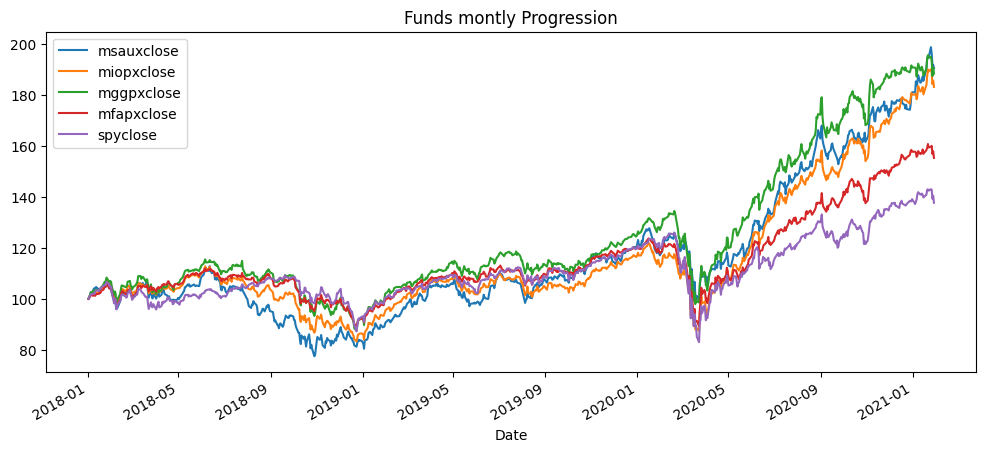

In [18]:
funds=funds.dropna()
performance=funds.calc_stats()
performance.plot(figsize=(12,5))

_=plt.xlabel('Date')
_=plt.title('Funds montly Progression')
plt.legend();

### – Display performance indicators

In [19]:
performance.display()

Stat                 msauxclose    miopxclose    mggpxclose    mfapxclose    spyclose
-------------------  ------------  ------------  ------------  ------------  ----------
Start                2018-01-02    2018-01-02    2018-01-02    2018-01-02    2018-01-02
End                  2021-01-29    2021-01-29    2021-01-29    2021-01-29    2021-01-29
Risk-free rate       0.00%         0.00%         0.00%         0.00%         0.00%

Total Return         90.51%        83.17%        88.43%        55.31%        37.69%
Daily Sharpe         1.05          1.04          1.02          0.85          0.57
Daily Sortino        1.74          1.61          1.58          1.28          0.84
CAGR                 23.32%        21.76%        22.88%        15.40%        10.96%
Max Drawdown         -31.35%       -28.34%       -27.19%       -27.78%       -34.10%
Calmar Ratio         0.74          0.77          0.84          0.55          0.32

MTD                  5.21%         1.68%         -1.23%        -1.

### – Calculate the drawdown series

In [20]:
funds.to_drawdown_series().tail()

,msauxclose,miopxclose,mggpxclose,mfapxclose,spyclose
Date,,,,,
2021-01-25,0.000000,0.000000,-0.003398,-0.006645,0.000000
2021-01-26,-0.012809,-0.007008,-0.011554,-0.004430,-0.001561
2021-01-27,-0.036099,-0.030367,-0.041912,-0.024363,-0.025963
2021-01-28,-0.034934,-0.023359,-0.024468,-0.017719,-0.017586
2021-01-29,-0.041630,-0.036440,-0.036928,-0.033961,-0.037254


The example above that compared funds and an ETF, compared in performance the MSAUX as the best option based on the total return, the CAGR and the 12-month percentage. The data also shows that it is the riskier asset in its class with an average drawdown of −3.55%, the highest average drawdown days with 30.15 and a high average drawdown per month. The information of the performance report can be applied to everything learned in this book.